In [64]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [65]:
m = 0.7
g = 9.8
l = 0.39
k = 9.4
b = 0.025
theta0 = -0.9739239711


def analytical_solve(Tf: int, h: int):
    c1 = theta0
    c2 = -0.002801
    alpha = -0.01785
    w = 6.209
    t = np.arange(0, Tf + h, h)
    x = np.exp(alpha * t) * ( c1 * np.cos(w * t) + c2 * np.sin(w * t) )
    return x, t

def pendulum_spring_system(state: list):
    theta, dtheta = state

    ddtheta = - (g/l) * np.sin(theta) - (k/m) * theta - (b/m) * dtheta

    return np.array([dtheta, ddtheta])

def pendulum_bckw_euler(fun:object, x0:np.ndarray, t_f:float, h:float) -> tuple:

    t = np.arange(0, t_f+h, h)

    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0

    for k in range(len(t)-1):
        e = 1 # an initial error value
        x_hist[:, k+1] = x_hist[:, k]
        while e > 1e-8:
            x_n = x_hist[:, k] + h*fun(x_hist[:, k+1])
            e = np.linalg.norm(x_n - x_hist[:,k+1]) # an error value
            x_hist[:, k+1] = x_n

    return x_hist, t

In [66]:
math.sin(0.3)

0.29552020666133955

time = 100
step = 0.01


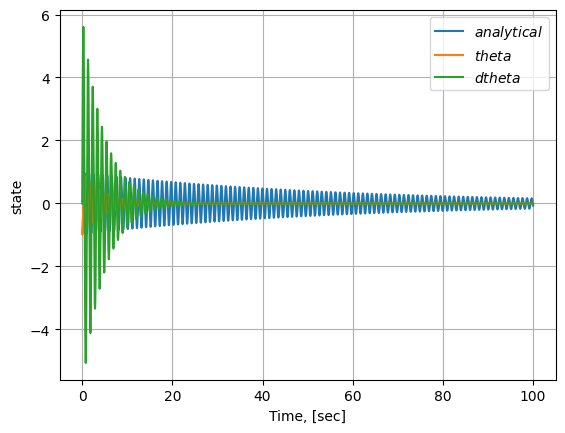

In [74]:
Tf = 100
h = .01

theta_initial = np.array([theta0, 0])
theta_, t_ = analytical_solve(Tf, h)
theta_hist, t_hist = pendulum_bckw_euler(pendulum_spring_system, theta_initial, Tf, h)

print(f"time = {Tf}")
print(f"step = {h}")
plt.plot(t_hist, theta_, label="$analytical$")
plt.plot(t_hist, theta_hist[0,:], label="$theta$")
plt.plot(t_hist, theta_hist[1,:], label="$dtheta$")
plt.xlabel('Time, [sec]')
plt.ylabel('state')
plt.legend()
plt.grid()